# COVID-19 Pediatric Dataset Analysis using Logistic Regression

Applying the Supervised Learning Technique, Logistic Regression, to the COVID-19 Pediatric Dataset to predict test results based on various features.

In [6]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.impute import SimpleImputer
import seaborn as sns
import matplotlib.pyplot as plt

## Data Loading and Initial Exploration

In [7]:
# Load the dataset
data = pd.read_excel('COVID19 Pediatric Dataset.xlsx')

# Display basic information about the dataset
print("Dataset Shape:", data.shape)
print("\nFirst few rows:")
display(data.head())

print("\nColumn information:")
display(data.info())

Dataset Shape: (5644, 111)

First few rows:


,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,...,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
0,44477f75e8169d2,13,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,126e9dd13932f68,17,negative,0,0,0,0.236515,-0.02234,-0.517413,0.010677,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,a46b4402a0e5696,8,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,f7d619a94f97c45,5,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,d9e41465789c2b5,15,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



Column information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5644 entries, 0 to 5643
Columns: 111 entries, Patient ID to ctO2 (arterial blood gas analysis)
dtypes: float64(70), int64(4), object(37)
memory usage: 4.8+ MB


None

## Data Preprocessing

In [8]:
# Check for missing values
print("Missing values in each column:")
missing_values = data.isnull().sum()
display(missing_values)

# Drop rows with missing target variable
data = data.dropna(subset=['SARS-Cov-2 exam result'])

# Encode target variable (Positive: 1, Negative: 0)
data['SARS-Cov-2 exam result'] = data['SARS-Cov-2 exam result'].map({'positive': 1, 'negative': 0})

# Select features and target
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
X = data[numeric_columns].drop('SARS-Cov-2 exam result', axis=1, errors='ignore')
y = data['SARS-Cov-2 exam result']

# Remove columns with too many missing values (e.g., more than 90%)
missing_percentages = X.isnull().sum() / len(X) * 100
columns_to_keep = missing_percentages[missing_percentages < 90].index
X = X[columns_to_keep]

# Create an imputer for handling missing values
imputer = SimpleImputer(strategy='mean')

# Fit and transform the data
X_imputed = imputer.fit_transform(X)
X = pd.DataFrame(X_imputed, columns=X.columns, index=X.index)

print("\nFeatures used for prediction after removing high-missing columns:")
display(X.columns)
print(f"\nNumber of features used: {len(X.columns)}")

Missing values in each column:


Patient ID                                                  0
Patient age quantile                                        0
SARS-Cov-2 exam result                                      0
Patient addmited to regular ward (1=yes, 0=no)              0
Patient addmited to semi-intensive unit (1=yes, 0=no)       0
                                                         ... 
HCO3 (arterial blood gas analysis)                       5617
pO2 (arterial blood gas analysis)                        5617
Arteiral Fio2                                            5624
Phosphor                                                 5624
ctO2 (arterial blood gas analysis)                       5617
Length: 111, dtype: int64


Features used for prediction after removing high-missing columns:


Index(['Patient age quantile',
       'Patient addmited to regular ward (1=yes, 0=no)',
       'Patient addmited to semi-intensive unit (1=yes, 0=no)',
       'Patient addmited to intensive care unit (1=yes, 0=no)', 'Hematocrit',
       'Hemoglobin', 'Platelets', 'Mean platelet volume ', 'Red blood Cells',
       'Lymphocytes', 'Mean corpuscular hemoglobin concentration (MCHC)',
       'Leukocytes', 'Basophils', 'Mean corpuscular hemoglobin (MCH)',
       'Eosinophils', 'Mean corpuscular volume (MCV)', 'Monocytes',
       'Red blood cell distribution width (RDW)'],
      dtype='object')


Number of features used: 18


## Data Visualization

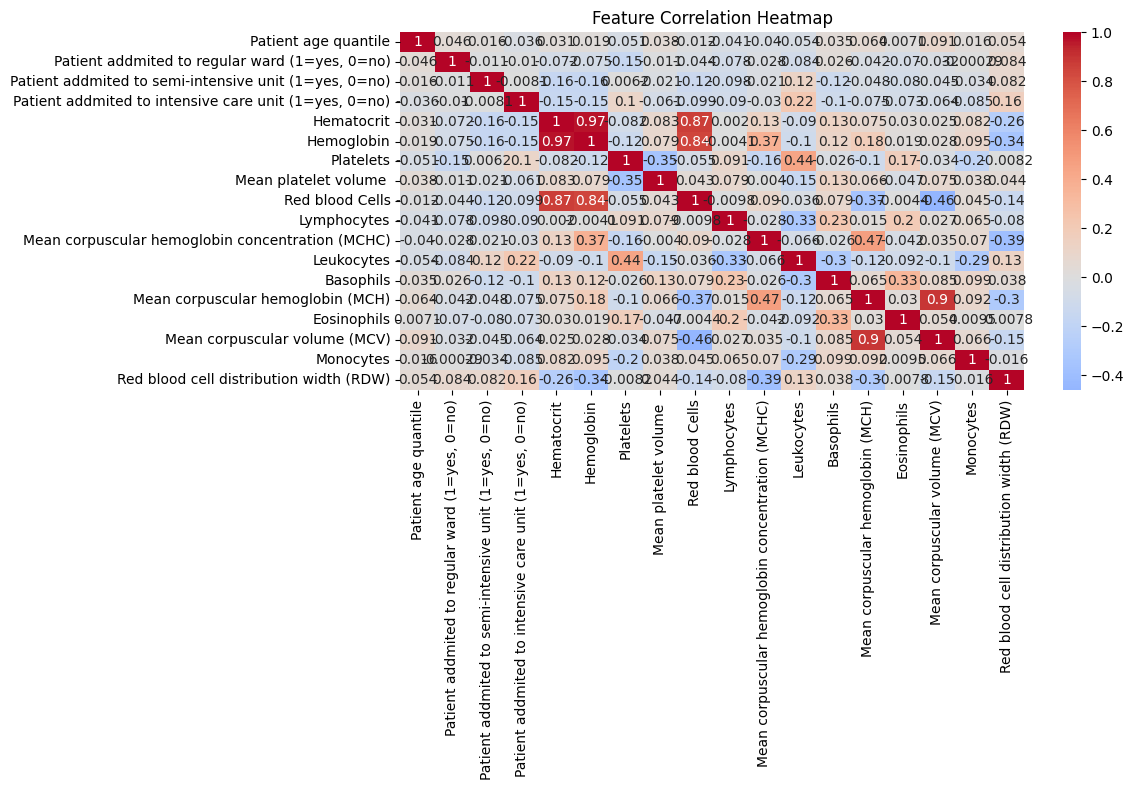

In [9]:
# Create correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(X.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Feature Correlation Heatmap')
plt.tight_layout()
plt.show()

## Model Training and Evaluation

Classification Report:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95      1021
           1       0.80      0.07      0.14       108

    accuracy                           0.91      1129
   macro avg       0.86      0.54      0.54      1129
weighted avg       0.90      0.91      0.87      1129



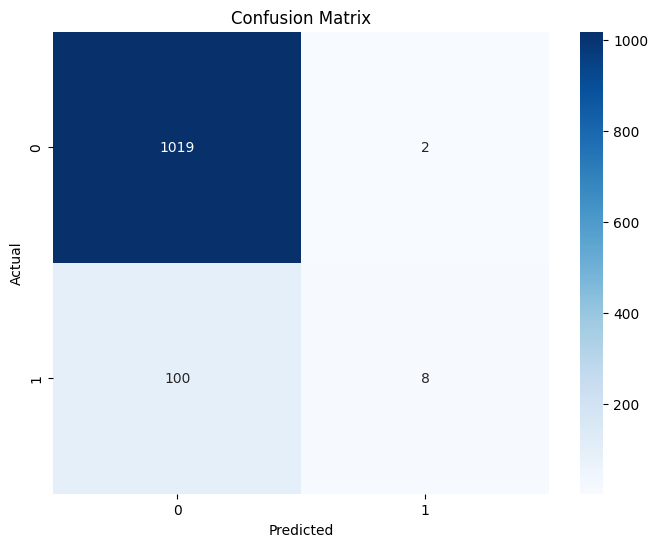

In [10]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the logistic regression model
log_reg = LogisticRegression(random_state=42, max_iter=1000)
log_reg.fit(X_train_scaled, y_train)

# Make predictions
y_pred = log_reg.predict(X_test_scaled)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Create confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Feature Importance Analysis

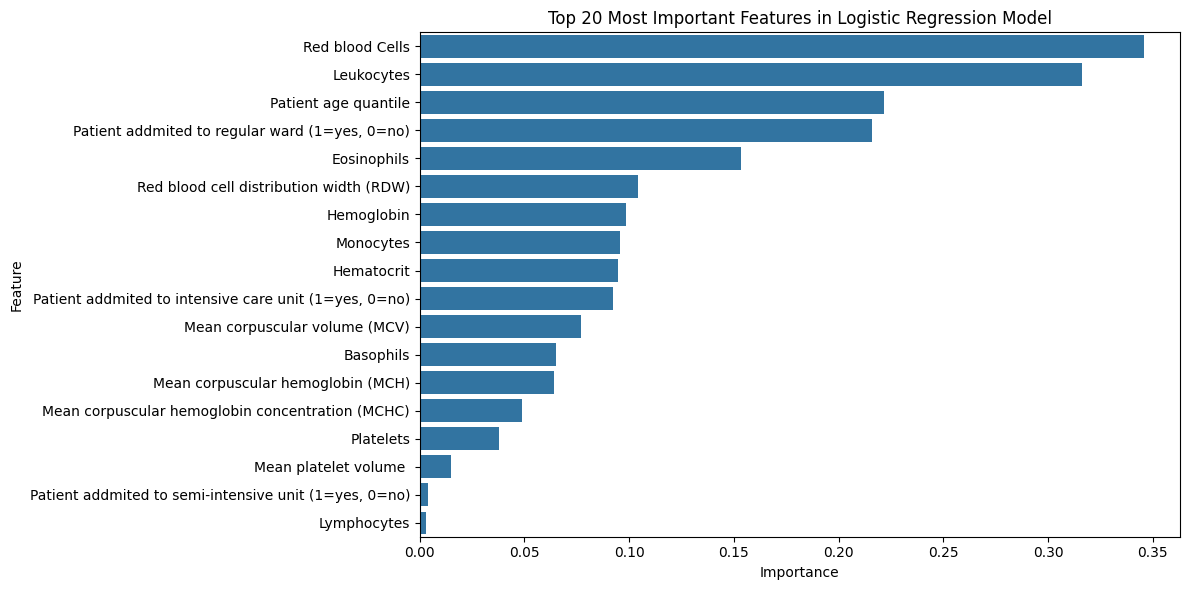

In [11]:
# Get feature importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': np.abs(log_reg.coef_[0])
})
feature_importance = feature_importance.sort_values('Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(12, 6))
sns.barplot(data=feature_importance.head(20), x='Importance', y='Feature')
plt.title('Top 20 Most Important Features in Logistic Regression Model')
plt.tight_layout()
plt.show()